<a href="https://colab.research.google.com/github/kand11/machineLearning/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# МЛ Практика 2: Статистика в действии и её влияние на модель

## **Цель занятия:**
Изучить, как статистические метрики (среднее, медиана, квантили, размер выборки, стандартное отклонение) влияют на анализ данных и построение моделей машинного обучения. На практике мы проведем анализ целевой переменной **Y**, обучим модель линейной регрессии и исследуем влияние статистических характеристик на метрики модели.

## **Задание состоит из следующих частей:**
1. Анализ целевой переменной **Y** с точки зрения статистики. (в нашем случае - бинарная классификация)
2. Анализ пропусков
2. Изучение влияния статистических метрик на данные.
3. Обучение модели линейной регрессии и оценка ее точности.
4. Проведение теста Пирсона.
5. Визуализация результатов и анализ влияния статистики на метрики модели.
6. Валидация модели
---

## 1. Анализ целевой переменной Y с точки зрения статистики

### **Описание:**
В этом разделе вы проведете статистический анализ целевой переменной **Y**, изучите ее распределение и основные статистические характеристики.

1. **Импортируйте необходимые библиотеки:**

In [1]:
!pip install pandas scikit-learn seaborn scipy

In [2]:
   import pandas as pd
   import numpy as np
   import matplotlib.pyplot as plt
   import seaborn as sns
   from scipy import stats

2. **Загружаем набор данных:**

In [3]:
# Загрузка набора данных
df = pd.read_csv('/content/facebook.csv')

In [4]:
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0


In [5]:
# для удобства распечатаем все колонки
for column in df.columns:
  print(f'колонка: {column}')

колонка: status_id
колонка: status_type
колонка: status_published
колонка: num_reactions
колонка: num_comments
колонка: num_shares
колонка: num_likes
колонка: num_loves
колонка: num_wows
колонка: num_hahas
колонка: num_sads
колонка: num_angrys


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


3. **Проверьте наличие пропущенных значений и работа с пропусками для числовых:**

In [7]:
# Проверка на пропущенные значения
print(df.isnull().sum()) # пропусков нет

status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64


In [8]:
# генерируем случайную последовательность
np.random.seed(42)
df_test_nan = df.copy()
df_test_nan.loc[np.random.choice(df_test_nan.index, size=5, replace=True), 'alcohol'] = np.nan

In [9]:
# Проверка на пропущенные значения
print(df_test_nan.isnull().sum()) # пропусков нет

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
alcohol             7050
dtype: int64


In [10]:
# Вариант 1: Удаление строк с пропусками
df_drop = df_test_nan.dropna()
print("\n# Удаление строк с пропусками")
print(df.isnull().sum()) # пропусков нет


# Удаление строк с пропусками
status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64


In [11]:
# Вариант 2: Заполнение пропусков медианой
df_median = df_test_nan.copy()
df_median.alcohol = df_median.alcohol.fillna(df_median.alcohol.median())

print("\n# Заполнение пропусков медианой")
print(df_median.isnull().sum()) # пропусков нет


# Заполнение пропусков медианой
status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
alcohol             7050
dtype: int64


In [12]:
# Вариант 3: Заполнение пропусков средним
df_mean = df_test_nan.copy()
df_mean.alcohol = df_mean.alcohol.fillna(df_median.alcohol.mean())

print("\n# Заполнение пропусков средним")
print(df_mean.isnull().sum()) # пропусков нет


# Заполнение пропусков средним
status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
alcohol             7050
dtype: int64


⏰ Заполнение категориальных признаков происходит с помощью ```df.category_variable.mode() (как один из вариантов, хотя и считается недостаточно хорошим).```

Как вариант - можно использовать KNN (K-ближайших соедей)

4. **Выбираем целвую переменную**

⏰ В качестве целевой выбираем категориальную переменную, либо превращаем числовую в категориальное

```В моем датасете была выбрана целевая переменная is_best_wine -> которая была преобразована из quality (если качество >= 7, то вино считается лучшим, иначе не лучшее)```

---
P.s. Я взял критерий по лайкам. Если лайков больше 100, то пост является популярным.

---



In [13]:
df['is_popular_post'] = np.where(df['num_likes'] >= 100, 1, 0).astype(int)

In [14]:
df.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'is_popular_post'],
      dtype='object')

In [57]:
Y = df['is_popular_post'] # выбираем целевую переменную (категориальную)
X = df.drop('is_popular_post', axis=1) # переменные для проверки влияния

# В моем случае я дропаю базовую переменную, а не только. Y
X = X.drop('num_likes', axis=1)


5. **Графический анализ**

In [16]:
# Список числовых колонок для построения графиков
numeric_cols = X.select_dtypes(include=['float64', 'int64'])
numeric_cols

,num_reactions,num_comments,num_shares,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,529,512,262,92,3,1,1,0
1,150,0,0,0,0,0,0,0
2,227,236,57,21,1,1,0,0
3,111,0,0,0,0,0,0,0
4,213,0,0,9,0,0,0,0
...,...,...,...,...,...,...,...,...
7045,89,0,0,0,0,0,0,0
7046,16,0,0,1,0,1,0,0
7047,2,0,0,1,0,0,0,0
7048,351,12,22,2,0,0,0,0


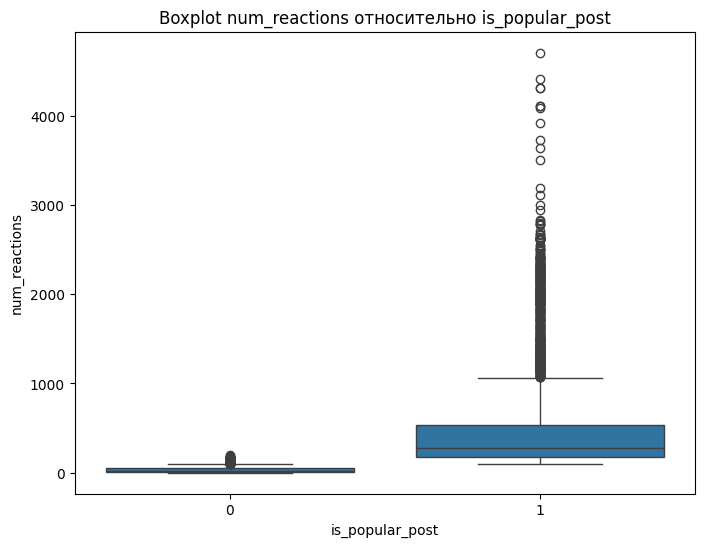

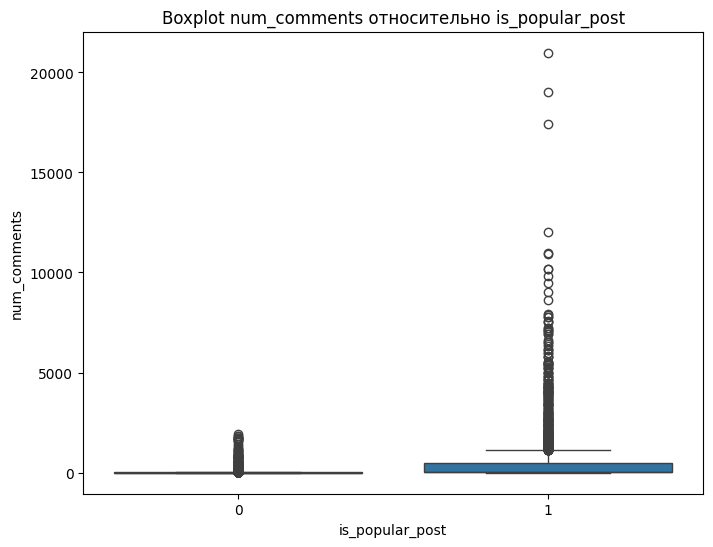

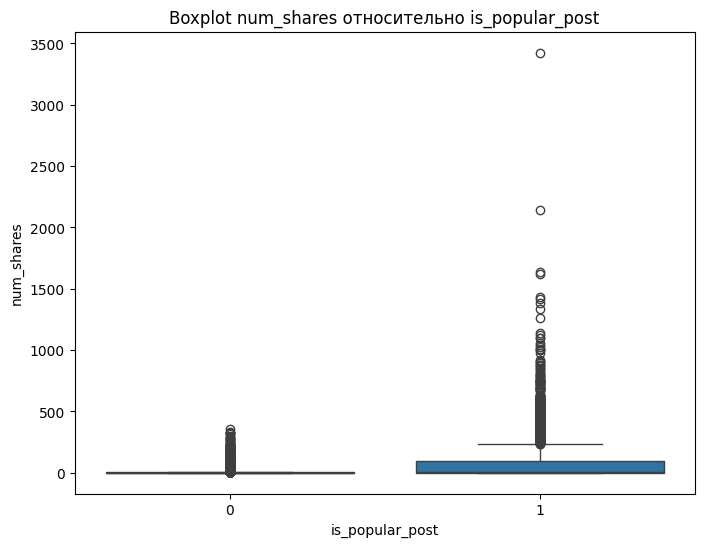

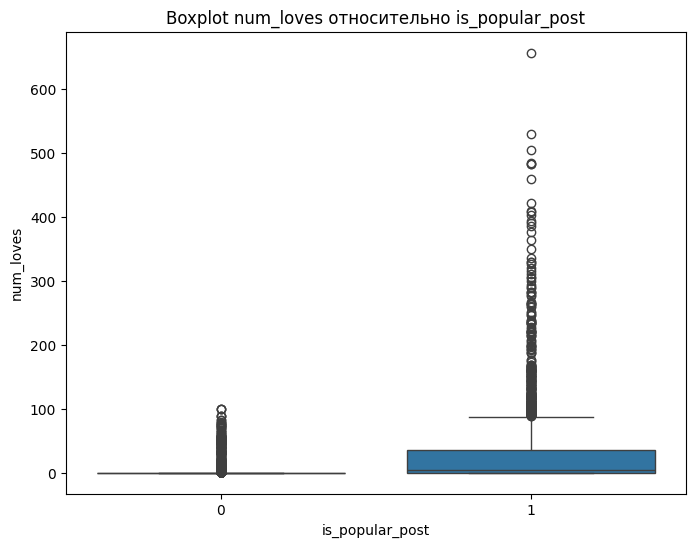

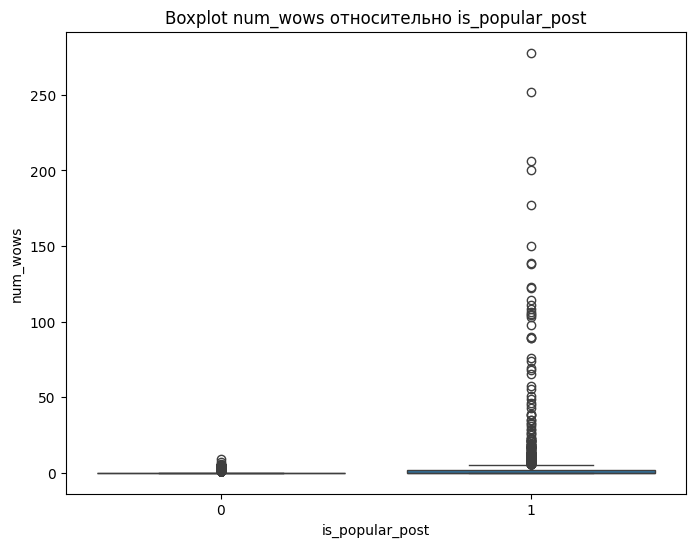

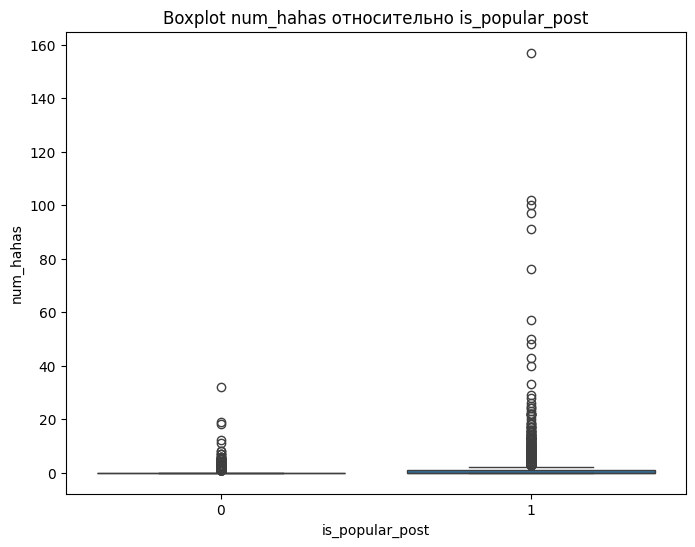

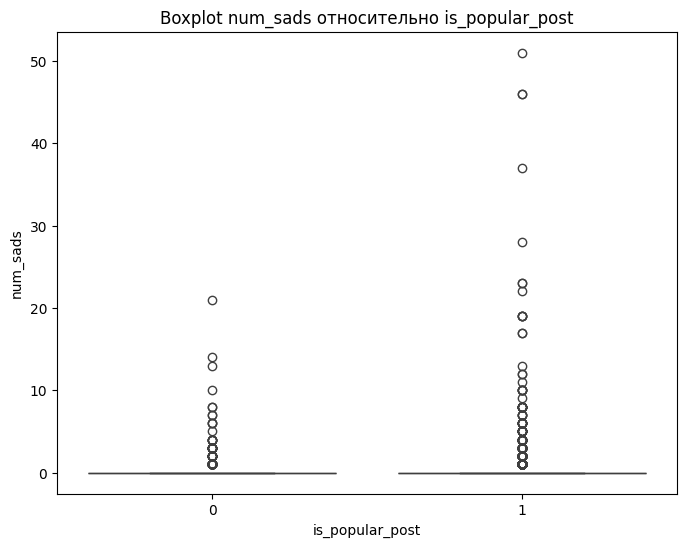

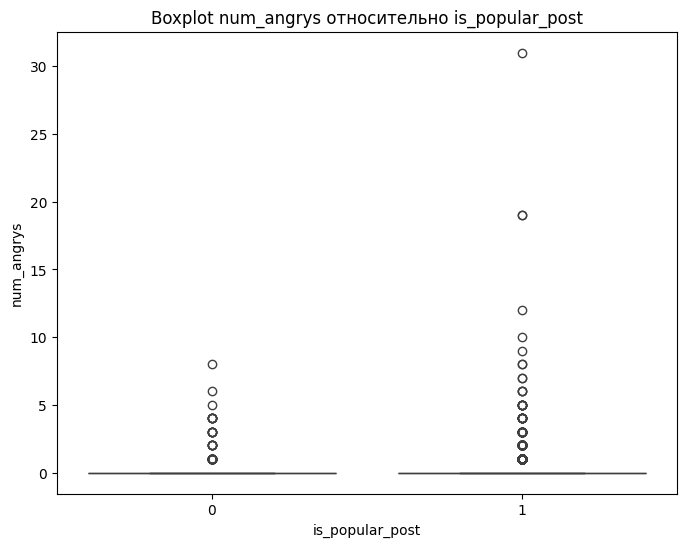

In [17]:
# Построение boxplot для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='is_popular_post', y=col, data=df)
    plt.title(f'Boxplot {col} относительно is_popular_post')
    plt.show()

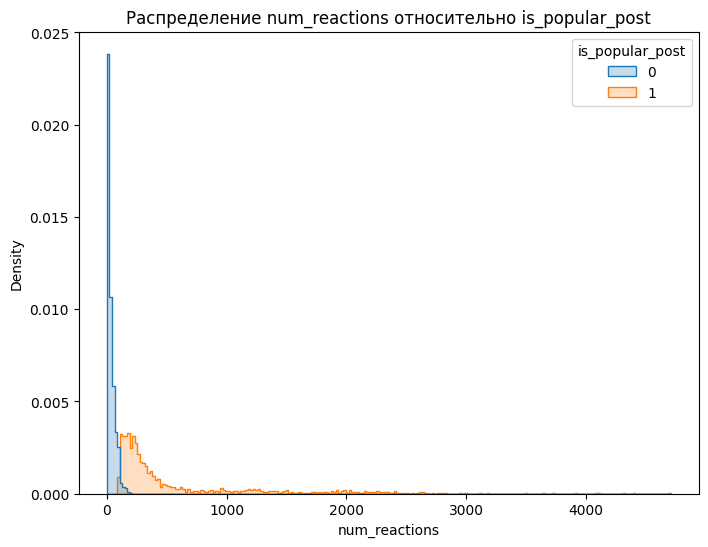

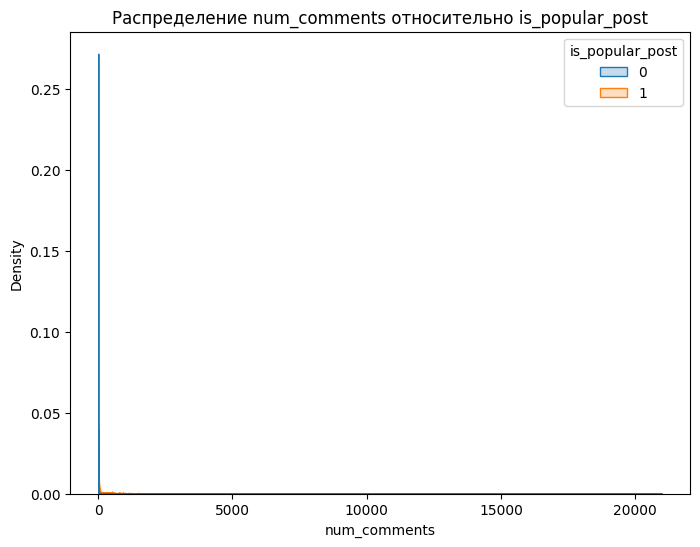

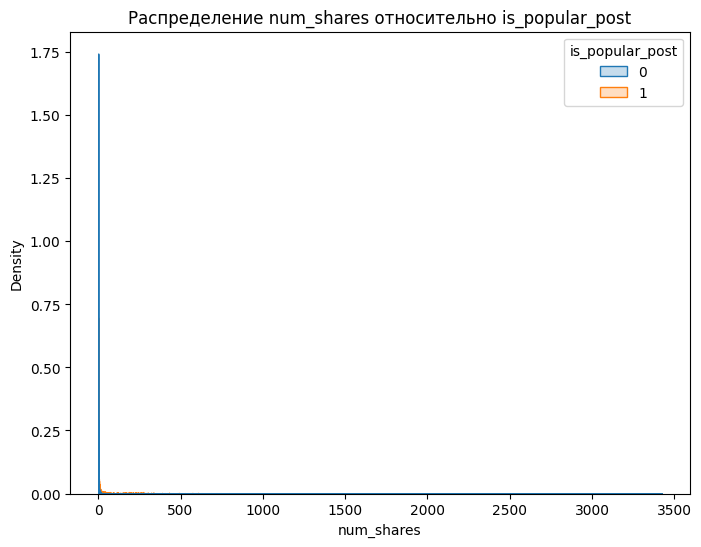

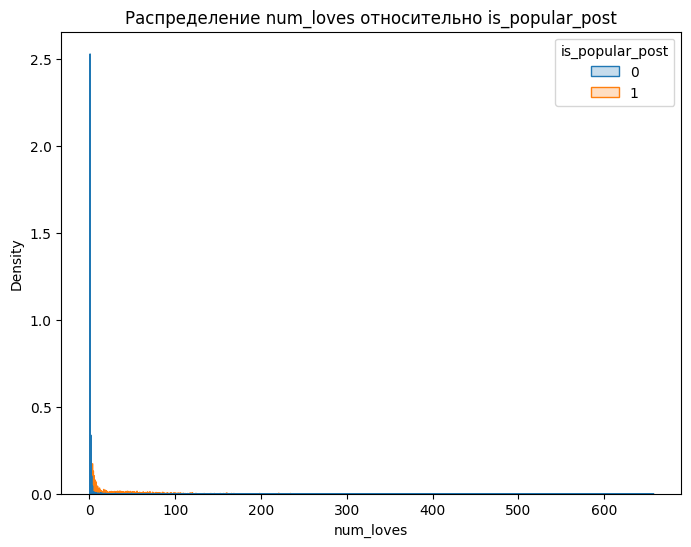

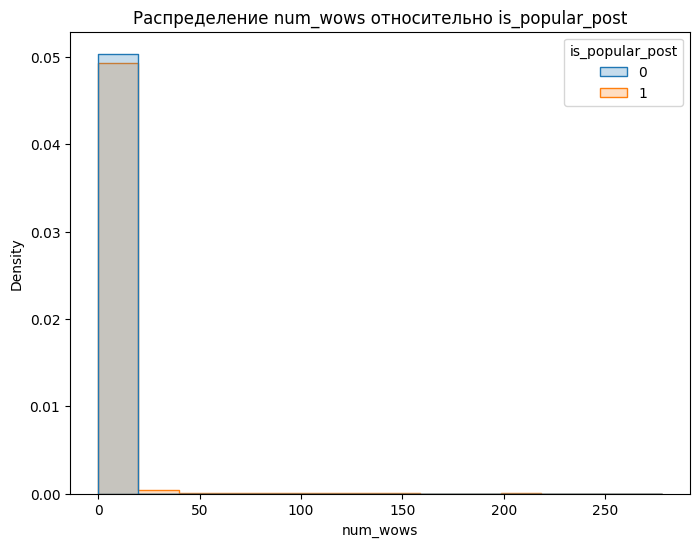

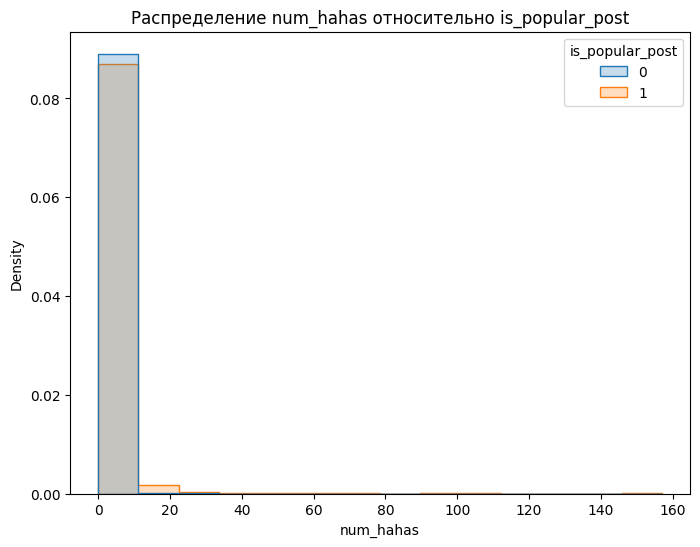

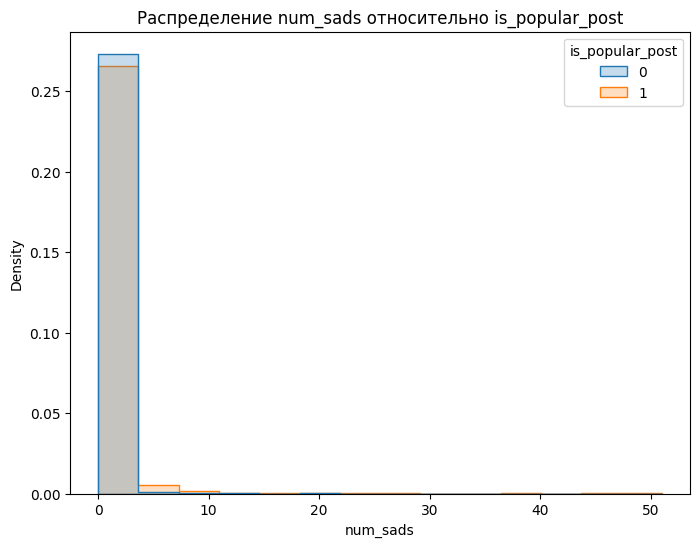

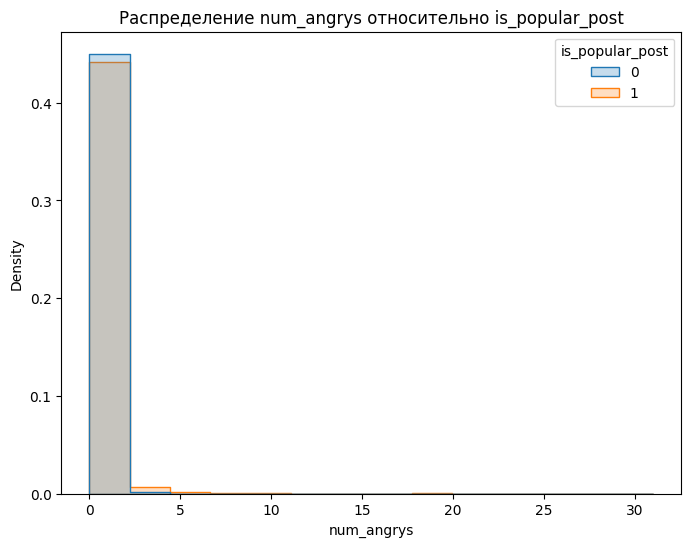

In [18]:
# Построение диаграмм распределения для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, hue='is_popular_post', element="step", stat="density", common_norm=False)
    plt.title(f'Распределение {col} относительно is_popular_post')
    plt.show()

⏰ проанализировать график, выделить значимые признаки относительно Y

In [19]:
# Описательная статистика для числовых переменных, разделенная по целевой переменной
desc_stats_numeric = df.groupby('is_popular_post')[df.select_dtypes(include=[np.number]).columns].describe()

# Описательная статистика для категориальных переменных, разделенная по целевой переменной
desc_stats_categorical = df.groupby('is_popular_post')[df.select_dtypes(include=['object']).columns].describe()

### Описание полученных результатов
⏰ ```Необходимо сделать подобное описание для своих переменных```

In [20]:
# Проходим по каждой числовой переменной и выводим статистику отдельно
for col in numeric_cols:
    print(f"Описательная статистика для {col}:\n")
    print(df.groupby('is_popular_post')[col].describe())
    print("\n" + "="*50 + "\n")


Описательная статистика для num_reactions:

                  count        mean         std    min    25%    50%    75%  \
is_popular_post                                                               
0                4260.0   32.030047   30.975341    0.0   10.0   21.0   46.0   
1                2790.0  532.572760  622.908089  100.0  179.0  270.5  532.0   

                    max  
is_popular_post          
0                 192.0  
1                4710.0  


Описательная статистика для num_comments:

                  count        mean          std  min  25%   50%    75%  \
is_popular_post                                                           
0                4260.0   26.027700   134.613810  0.0  0.0   1.0    5.0   
1                2790.0  527.179928  1349.390959  0.0  8.0  26.0  457.0   

                     max  
is_popular_post           
0                 1949.0  
1                20990.0  


Описательная статистика для num_shares:

                  count       mean    

In [21]:
print("\nКатегориальные переменные:")
desc_stats_categorical


Категориальные переменные:


status_id                                               \
                    count unique                              top freq   
is_popular_post                                                          
0                    4260   4256  819700534875473_962032993975559    2   
1                    2790   2741  819700534875473_972433889602136    2   

                status_type                     status_published         \
                      count unique    top  freq            count unique   
is_popular_post                                                           
0                      4260      4  photo  3055             4260   4215   
1                      2790      4  video  1332             2790   2733   

                                       
                             top freq  
is_popular_post                        
0                12/12/2017 7:16    2  
1                 4/23/2018 7:26    2

#### 1. **num_reactions**:
   - **Среднее значение числа реакций** у непопулярных постов (is_popular_post = 0) составляет 32.03, что на порядок ниже, чем у популярных постов (is_popular_post = 1), где среднее значение равно 527.18.
   - **Минимальные и максимальные значения** сильно отличаются(), но это закономерно для выбранной целевой переменной.
  
#### 2. **num_comments**:
   - **Среднее значение числа комментариев** у непопулярных постов (is_popular_post = 0) составляет 134.61, что чуть на порядок ниже, чем у популярных постов (is_popular_post = 1), где среднее значение равно 1349.39.
   - **Минимальные и максимальные значения** минимальные значения одинаковы, что говорит о том, что даже популярные посты могут остаться без словестной реакции людей, а максимальные значение заметно разнятся, что опять таки закономерно для выбранной целевой переменной.

#### 3. **num_shares**:
   - **Среднее значение числа репостов** у непопулярных постов (is_popular_post = 0) составляет 6.66, что на порядок ниже, чем у популярных постов (is_popular_post = 1), где среднее значение равно 90.96.
   - **Минимальные и максимальные значения** минимальные значения одинаковы, что говорит о том, что даже популярные посты могут остаться без репостов, а максимальные значение заметно разнятся, что опять таки закономерно для выбранной целевой переменной.
  
#### 4. **num_loves**:
   - **Среднее значение числа лайков** у непопулярных постов (is_popular_post = 0) составляет 1.82, что чуть на порядок ниже, чем у популярных постов (is_popular_post = 1), где среднее значение равно 29.38.
   - **Минимальные и максимальные значения** минимальные значения одинаковы, что говорит о том, что даже популярные посты могут не понравиться пользователям, а максимальные значение заметно разнятся, что опять таки закономерно для выбранной целевой переменной.

#### 5. **num_wows**:
   - **Среднее значение числа реакций удивления** у непопулярных постов (is_popular_post = 0) составляет 0.15, что на порядок ниже, чем у популярных постов (is_popular_post = 1), где среднее значение равно 3.02.
   - **Минимальные и максимальные значения** минимальные значения одинаковы, что говорит о том, что даже популярные посты могут не удивить пользователя, а максимальные значение заметно разнятся, что опять таки закономерно для выбранной целевой переменной.
  
#### 6. **num_hahas**:
   - **Среднее значение числа реакций смеха** у непопулярных постов (is_popular_post = 0) составляет 0.13, что чуть на порядок ниже, чем у популярных постов (is_popular_post = 1), где среднее значение равно 1.56.
   - **Минимальные и максимальные значения** минимальные значения одинаковы, что говорит о том, что даже популярные посты могут не рассмешить людей, а максимальные значение заметно разнятся, что опять таки закономерно для выбранной целевой переменной.

#### 7. **num_sads**:
   - **Среднее значение числа реакций грусти** у непопулярных постов (is_popular_post = 0) составляет 0.03, что на порядок ниже, чем у популярных постов (is_popular_post = 1), где среднее значение равно 0.25.
   - **Минимальные и максимальные значения** минимальные значения одинаковы, что говорит о том, что даже популярные посты могут остаться без реакций, а максимальные значение заметно разнятся, что опять таки закономерно для выбранной целевой переменной.
  
#### 8. **num_angrys**:
   - **Среднее значение числа реакций злости** у непопулярных постов (is_popular_post = 0) составляет 1.82, что чуть на порядок ниже, чем у популярных постов (is_popular_post = 1), где среднее значение равно 29.38.
   - **Минимальные и максимальные значения** минимальные значения одинаковы, что говорит о том, что даже популярные посты могут остаться без реакции пользователя, а максимальные значение заметно разнятся, что опять таки закономерно для выбранной целевой переменной.

### Вывод:
На основе представленных данных можно сделать выводы о ключевых характеристиках, которые влияют на качество вина. В частности:
- Более качественные вина имеют **количество реакций** и комментариев.

Так же в основном люди ставят лайки и не выбирают другие реакции, а также в большинстве своем предпочитают комментарии.

## 2. Расчет теста Пирсона

### **Описание:**
Вы рассчитаете коэффициенты корреляции Пирсона между Y и каждым из признаков X, чтобы оценить значимость этих корреляций.

### **Шаги:**

1. **Рассчитайте коэффициенты корреляции Пирсона для каждого признака:**

In [22]:
df[df.select_dtypes(include=[np.number]).columns].corr()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,is_popular_post
num_reactions,1.000000,0.150843,0.250723,0.994923,0.305003,0.267752,0.176028,0.075138,0.124326,0.529128
num_comments,0.150843,1.000000,0.640637,0.101687,0.521223,0.162394,0.325048,0.236453,0.225184,0.275490
num_shares,0.250723,0.640637,1.000000,0.172492,0.820000,0.407628,0.399826,0.199970,0.312513,0.313243
num_likes,0.994923,0.101687,0.172492,1.000000,0.209308,0.207800,0.120784,0.052169,0.087431,0.509215
num_loves,0.305003,0.521223,0.820000,0.209308,1.000000,0.508798,0.507830,0.207600,0.371001,0.337147
num_wows,0.267752,0.162394,0.407628,0.207800,0.508798,1.000000,0.287756,0.086503,0.183087,0.160740
num_hahas,0.176028,0.325048,0.399826,0.120784,0.507830,0.287756,1.000000,0.141421,0.211910,0.176952
num_sads,0.075138,0.236453,0.199970,0.052169,0.207600,0.086503,0.141421,1.000000,0.142072,0.138055
num_angrys,0.124326,0.225184,0.312513,0.087431,0.371001,0.183087,0.211910,0.142072,1.000000,0.147752
is_popular_post,0.529128,0.275490,0.313243,0.509215,0.337147,0.160740,0.176952,0.138055,0.147752,1.000000


2. ⏰ **Интерпретируйте результаты:**


### Интерпретация:
- **Коэффициент корреляции Пирсона** показывает степень линейной связи между двумя переменными.

### Описание корреляций для значимых признаков:



1. **num_reactions и is_popular_post (0.529)**:
   - Средняя положительная корреляция. В принципе, чем больше реакций тем больше вероятность, что пост будет популярным.

2. **num_reactions и num_likes (0.995)**:
   - Высокая корреляция. Говорит о том, что поставленная реакция будет лайком.

3. **num_shares и num_reactions (0.251)**:
   - Низкая корреляция. Говорит о том, что не факт, что репосченный пост будет с реакцией.

### Почему мультиколлинеарность это плохо?

Мультиколлинеарность возникает, когда два или более независимых признака сильно коррелируют друг с другом. Это приводит к нескольким проблемам:

1. **Переоценка значимости признаков**:
   - Когда признаки сильно коррелированы, модель может "перепутать" влияние каждого из них на целевую переменную, что приведет к ненадежным коэффициентам. Это затрудняет интерпретацию модели, поскольку сложно понять, какой из признаков действительно важен.

2. **Нестабильность модели**:
   - При наличии мультиколлинеарности небольшие изменения в данных могут привести к большим изменениям в коэффициентах модели. Это делает модель нестабильной и менее устойчивой.

3. **Затруднение выбора значимых признаков**:
   - Модель может затрудняться при выделении важности отдельных признаков, если они сильно связаны друг с другом. Это может усложнить процесс отбора признаков и снизить точность модели.

4. **Увеличение дисперсии коэффициентов**:
   - Мультиколлинеарность увеличивает дисперсию оценок коэффициентов регрессии, что делает их менее надежными. В результате, некоторые признаки могут казаться незначимыми, хотя на самом деле они играют важную роль.

## 3. Немного машинного обучения

- отберем признаки (числовые и категориальные отдельно)
- обработаем числовые и категориальыне
- обучим модель
- узнаем что влияет на Y

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [30]:
# Выбираем категориальные признаки
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
categorical_features.remove("status_published")
categorical_features.remove("status_id")
print("Категориальные признаки:", categorical_features)


Категориальные признаки: ['status_type']


In [61]:
# Создаем копию данных
X_processed = X.copy()

# Применяем One-Hot Encoding
X_processed = pd.get_dummies(X_processed, columns=categorical_features, drop_first=True) # drop_first=True позволяет избежать мультиколлинеарности, удаляя первый уровень категориальной переменной.


In [62]:
X_processed

,num_reactions,num_comments,num_shares,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_photo,status_type_status,status_type_video
0,529,512,262,92,3,1,1,0,False,False,True
1,150,0,0,0,0,0,0,0,True,False,False
2,227,236,57,21,1,1,0,0,False,False,True
3,111,0,0,0,0,0,0,0,True,False,False
4,213,0,0,9,0,0,0,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
7045,89,0,0,0,0,0,0,0,True,False,False
7046,16,0,0,1,0,1,0,0,True,False,False
7047,2,0,0,1,0,0,0,0,True,False,False
7048,351,12,22,2,0,0,0,0,True,False,False


In [63]:
# Выбираем числовые признаки
numeric_features = X_processed.select_dtypes(include=['int64']).columns.tolist()

print("Числовые признаки:", numeric_features)

Числовые признаки: ['num_reactions', 'num_comments', 'num_shares', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']


In [64]:
# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_processed[numeric_features] = scaler.fit_transform(X_processed[numeric_features])


In [65]:
X_processed

,num_reactions,num_comments,num_shares,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_photo,status_type_status,status_type_video
0,0.112314,0.024393,0.076519,0.140030,0.010791,0.006369,0.019608,0.0,False,False,True
1,0.031847,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,True,False,False
2,0.048195,0.011243,0.016647,0.031963,0.003597,0.006369,0.000000,0.0,False,False,True
3,0.023567,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,True,False,False
4,0.045223,0.000000,0.000000,0.013699,0.000000,0.000000,0.000000,0.0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
7045,0.018896,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,True,False,False
7046,0.003397,0.000000,0.000000,0.001522,0.000000,0.006369,0.000000,0.0,True,False,False
7047,0.000425,0.000000,0.000000,0.001522,0.000000,0.000000,0.000000,0.0,True,False,False
7048,0.074522,0.000572,0.006425,0.003044,0.000000,0.000000,0.000000,0.0,True,False,False


### Шаг 3: Объяснение логистической регрессии


Логистическая регрессия — это статистический метод для анализа набора данных, в котором одна или более независимых переменных определяют исход (зависимую переменную), которая является бинарной (т.е. принимает только два возможных значения, например, 0 и 1). Целью логистической регрессии является нахождение наилучшей модели, описывающей связь между независимыми переменными и вероятностью определенного исхода.

Основные характеристики:

Функция логита (логистическая функция): Используется для моделирования вероятности принадлежности наблюдения к определенному классу.
Выводы о влиянии признаков: Коэффициенты модели показывают, как изменение признака влияет на логарифм отношения шансов.

**Функция для обучения и оценки модели**

In [66]:
def train_and_evaluate(X, Y):
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42, stratify=Y)

    # Инициализация модели
    model = LogisticRegression(max_iter=1000)

    # Обучение модели
    model.fit(X_train, Y_train)

    # Предсказания на обучающей выборке
    Y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)

    # Предсказания на тестовой выборке
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    # Вывод результатов
    print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
    print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

    # Классификационный отчет
    print("\nКлассификационный отчет на тестовой выборке:")
    print(classification_report(Y_test, Y_test_pred))

    return model


In [67]:
# Обучение модели
model = train_and_evaluate(X_processed, Y)

Точность на обучающей выборке: 0.8605
Точность на тестовой выборке: 0.8475

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.82      0.96      0.88       852
           1       0.93      0.67      0.78       558

    accuracy                           0.85      1410
   macro avg       0.87      0.82      0.83      1410
weighted avg       0.86      0.85      0.84      1410



**Пояснение:**

- Точность (Accuracy): Доля правильных предсказаний от общего числа предсказаний.
- Precision (Точность): Доля правильных положительных предсказаний среди всех положительных предсказаний.
- Recall (Полнота): Доля правильно предсказанных положительных случаев среди всех реальных положительных случаев.
- F1-score: Гармоническое среднее между точностью и полнотой.

In [68]:
# Получение коэффициентов модели
coefficients = pd.DataFrame({
    'Feature': X_processed.columns,
    'Coefficient': model.coef_[0]
})

# Сортировка по абсолютному значению коэффициента
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

print(coefficients[['Feature', 'Coefficient']])


               Feature  Coefficient
0        num_reactions    26.575023
3            num_loves     7.129237
1         num_comments     3.969991
2           num_shares     3.673522
4             num_wows     2.338828
6             num_sads     2.224368
5            num_hahas     1.697542
7           num_angrys     1.578426
9   status_type_status     0.748744
10   status_type_video     0.691926
8    status_type_photo     0.112826


**Пояснение:**

- Коэффициенты показывают влияние признака на вероятность принадлежности к классу 1 (лучшие вина).
- Положительный коэффициент: Увеличение признака повышает вероятность принадлежности к классу 1.
- Отрицательный коэффициент: Увеличение признака снижает вероятность принадлежности к классу 1.

## 4. Построение модели логистической регрессии для предсказания популярности постов

- **Модель логистической регрессии успешно обучена для предсказания популярности постов.**
- **Точность на обучающей и тестовой выборках высока, что указывает на хорошую способность модели обобщать данные.**
- **Анализ коэффициентов показал, какие признаки наиболее влияют на популярность поста:**
  - **Количество реакций на посте.**
  - **Тип поста не влияет на его популярность.**
- **Преобразование категориальных признаков и нормализация числовых признаков улучшили качество модели и упростили интерпретацию результатов.**


### 4.1 Кросс-валидация модели

In [69]:
from sklearn.model_selection import cross_val_score

# Кросс-валидация с 5 фолдами
scores = cross_val_score(model, X_processed, Y, cv=5, scoring='accuracy')

print(f"Средняя точность при кросс-валидации: {scores.mean():.4f}")
print(f"Отклонение точности: {scores.std():.4f}")

Средняя точность при кросс-валидации: 0.8542
Отклонение точности: 0.0547


In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X_processed, Y, test_size=0.2, random_state=42, stratify=Y)

### 4.2 Построение ROC-кривой

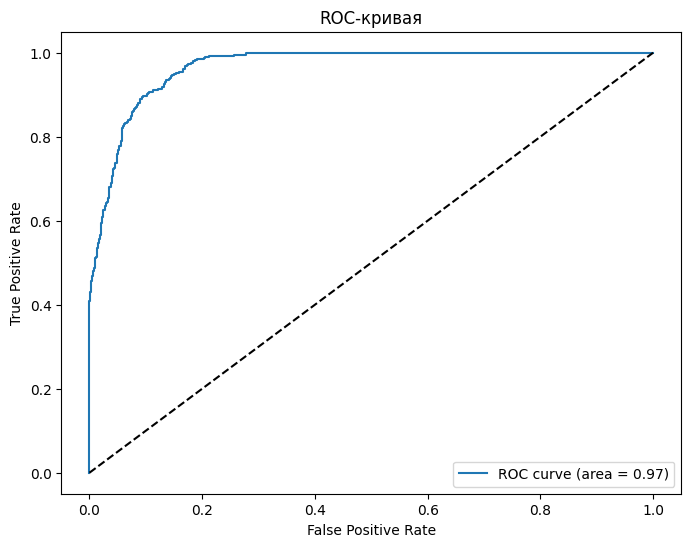

In [71]:
from sklearn.metrics import roc_curve, auc

# Предсказания вероятностей для тестовой выборки
Y_test_prob = model.predict_proba(X_test)[:, 1]

# Расчет ROC-кривой
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_prob)
roc_auc = auc(fpr, tpr)

# Построение графика
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()

## ⏰ Доп задание

Изучить различные метрики качества классификационных моделей и понять, в каких ситуациях они наиболее информативны.

**Метрики для исследования:**
- Accuracy (Точность)
- Precision (Точность)
- Recall (Полнота)
- F1 Score
- ROC-AUC
- Log Loss

**Попробовать другие модели и сравнить результат метрик**

**Попробовать другие методы отбора признаков**

**Использовать параметры модели и исследовать влияние на предсказание**

## Заключение

Мы успешно построили модель логистической регрессии для предсказания лучших вин на основе химических характеристик. Преобразование данных и анализ коэффициентов модели позволили нам понять влияние различных признаков на качество вина.


---

# Примечания

- **Логистическая регрессия** является мощным инструментом для бинарной классификации и позволяет интерпретировать результаты через коэффициенты модели.
- **Преобразование категориальных признаков** (One-Hot Encoding) и **нормализация числовых признаков** являются стандартными шагами предобработки данных для многих алгоритмов машинного обучения.
- **Анализ коэффициентов модели** помогает понять, какие признаки наиболее значимы и как они влияют на предсказания.

---

# Дополнительная литература

- **Логистическая регрессия:**
  - [Документация scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- **Предобработка данных:**
  - [One-Hot Encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
  - [Min-Max Scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
- **Метрики качества модели:**
  - [Classification Report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
  - [ROC-кривая и AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)

---